In [1]:
import scipy.io
import os
import pandas as pd
from tqdm import tqdm
import cv2
from pathlib import Path
import matplotlib.pyplot as plt



In [2]:
Base_dir = Path.cwd()

Data_dir = Base_dir/"C:/Projects/Car_Recognition/dataset/Stanford_Car_data"

Training_img_data = Data_dir/"cars_train"/"cars_train"
Testing_img_data = Data_dir/"cars_test"
Devkit_dir = Data_dir/"car_devkit/devkit"


Output_dir = Base_dir/ "dataset" / "processed"
Train_out = Output_dir / "train"
Test_out = Output_dir / "test"

In [3]:
Train_out.mkdir(parents=True,exist_ok=True)
Test_out.mkdir(parents=True, exist_ok=True)

Load annotation

In [4]:
train_ann_path = str(Devkit_dir / "cars_train_annos.mat")
test_ann_path  = str(Devkit_dir / "cars_test_annos.mat")
meta_path      = str(Devkit_dir / "cars_meta.mat")


train_ann = scipy.io.loadmat(train_ann_path)["annotations"][0]
test_ann = scipy.io.loadmat(test_ann_path)["annotations"][0]
meta = scipy.io.loadmat(meta_path)

class_names = [c[0] for c in meta["class_names"][0]]

print(f"Loaded {len(train_ann)} training annotations")
print(f"Loaded {len(test_ann)} testing annotations")
print(f"Total Classes: {len(class_names)}")

Loaded 8144 training annotations
Loaded 8041 testing annotations
Total Classes: 196


Change annotations to markdown

In [5]:
sample = train_ann[0]
for i, field in enumerate(sample):
    print(f"Index {i}: {field}")


Index 0: [[39]]
Index 1: [[116]]
Index 2: [[569]]
Index 3: [[375]]
Index 4: [[14]]
Index 5: ['00001.jpg']


In [6]:
import numpy as np

# Look at one annotation
sample = train_ann[0]

print("Type of sample:", type(sample))
print("Length:", len(sample))
print("\n--- Field breakdown ---")
for i, field in enumerate(sample):
    print(f"Index {i}: {field}\n")


Type of sample: <class 'numpy.void'>
Length: 6

--- Field breakdown ---
Index 0: [[39]]

Index 1: [[116]]

Index 2: [[569]]

Index 3: [[375]]

Index 4: [[14]]

Index 5: ['00001.jpg']



In [7]:
def annos_to_df(annos, class_names):
    records = []
    for a in annos:
        try:
            x1 = int(a[0][0])          # top-left X
            y1 = int(a[1][0])          # top-left Y
            x2 = int(a[2][0])          # bottom-right X
            y2 = int(a[3][0])          # bottom-right Y
            class_id = int(a[4][0])    # 1–196 class index
            fname = str(a[5][0])       # image file name
            label = class_names[class_id - 1]  # map class id to name
            records.append([fname, class_id, label, x1, y1, x2, y2])
        except Exception as e:
            print(f"Skipping record due to error: {e}")
            continue

    df = pd.DataFrame(records, columns=["file", "class_id", "label", "x1", "y1", "x2", "y2"])
    return df

train_df = annos_to_df(train_ann, class_names)
test_df = annos_to_df(test_ann, class_names)

print(" Train shape:", train_df.shape)
print(" Test shape:", test_df.shape)
train_df


Skipping record due to error: invalid literal for int() with base 10: np.str_('00001.jpg')
Skipping record due to error: invalid literal for int() with base 10: np.str_('00002.jpg')
Skipping record due to error: invalid literal for int() with base 10: np.str_('00003.jpg')
Skipping record due to error: invalid literal for int() with base 10: np.str_('00004.jpg')
Skipping record due to error: invalid literal for int() with base 10: np.str_('00005.jpg')
Skipping record due to error: invalid literal for int() with base 10: np.str_('00006.jpg')
Skipping record due to error: invalid literal for int() with base 10: np.str_('00007.jpg')
Skipping record due to error: invalid literal for int() with base 10: np.str_('00008.jpg')
Skipping record due to error: invalid literal for int() with base 10: np.str_('00009.jpg')
Skipping record due to error: invalid literal for int() with base 10: np.str_('00010.jpg')
Skipping record due to error: invalid literal for int() with base 10: np.str_('00011.jpg')

C:\Users\milin\AppData\Local\Temp\ipykernel_25852\3414255946.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x1 = int(a[0][0])          # top-left X
C:\Users\milin\AppData\Local\Temp\ipykernel_25852\3414255946.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y1 = int(a[1][0])          # top-left Y
C:\Users\milin\AppData\Local\Temp\ipykernel_25852\3414255946.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x2 = int(a[2][0])          # bottom-right X
C:\Use

,file,class_id,label,x1,y1,x2,y2
0,00001.jpg,14,Audi TTS Coupe 2012,39,116,569,375
1,00002.jpg,3,Acura TL Sedan 2012,36,116,868,587
2,00003.jpg,91,Dodge Dakota Club Cab 2007,85,109,601,381
3,00004.jpg,134,Hyundai Sonata Hybrid Sedan 2012,621,393,1484,1096
4,00005.jpg,106,Ford F-450 Super Duty Crew Cab 2012,14,36,133,99
...,...,...,...,...,...,...,...
8139,08140.jpg,78,Chrysler Town and Country Minivan 2012,3,44,423,336
8140,08141.jpg,196,smart fortwo Convertible 2012,138,150,706,523
8141,08142.jpg,163,Mercedes-Benz SL-Class Coupe 2009,26,246,660,449
8142,08143.jpg,112,Ford GT Coupe 2006,78,526,1489,908


In [8]:
def crop_and_save(df, src_folder, dst_root):
    for _, row in tqdm(df.iterrows(), total=len(df)):
        img_path = src_folder / row["file"]
        if not img_path.exists():
            continue

        img = cv2.imread(str(img_path))
        if img is None:
            continue
        
        h, w = img.shape[:2]

        x1 = max(0, min(w - 1, row["x1"]))
        y1 = max(0, min(h - 1, row["y1"]))
        x2 = max(0, min(w, row["x2"]))
        y2 = max(0, min(h, row["y2"]))

        crop = img[y1:y2, x1:x2]

        class_dir = dst_root / row["label"]
        class_dir.mkdir(parents=True, exist_ok=True)

        out_path = class_dir / row["file"]
        cv2.imwrite(str(out_path), crop)

In [9]:
crop_and_save(train_df, Training_img_data, Train_out)
crop_and_save(test_df, Testing_img_data, Test_out)


100%|██████████| 8144/8144 [01:48<00:00, 75.37it/s]
0it [00:00, ?it/s]


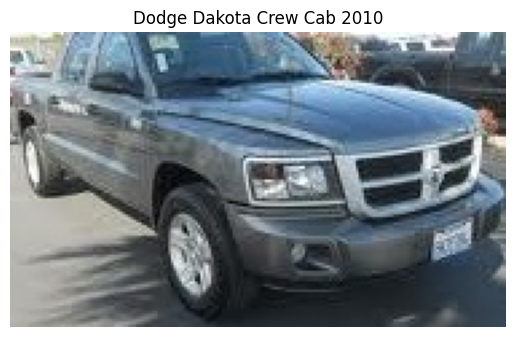

In [10]:
import random

sample_class = random.choice(os.listdir(Train_out))
sample_image = random.choice(os.listdir(Train_out / sample_class))
img_class = Train_out / sample_class / sample_image

img = cv2.imread(str(img_class))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title(sample_class)
plt.axis("off")
plt.show()